In [4]:
!pip install scipy

     |████████████████████████████████| 34.5 MB 3.2 MB/s eta 0:00:01


In [11]:
!pip install pandas
!pip install numpy

In [12]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("datos/world_data_full_apply_nulos.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


**Ejercicios estadística inferencial**
1. Evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson.

- ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?

- ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?

- ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?

- ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?

2. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

- Intervalo de Confianza para la Esperanza de Vida

In [47]:
def intervalo_confianza(dataframe, columna, nivel_confianza = float):
    """
    Calcula el intervalo de confianza para una columna específica en un DataFrame.

    Parámetros:
    -----------
    dataframe : DataFrame
        El DataFrame que contiene los datos de la muestra.
    columna : str
        El nombre de la columna para la cual deseas calcular el intervalo de confianza.
    nivel_confianza : float, opcional
        El nivel de confianza deseado para el intervalo de confianza (valor predeterminado es 0.95).

    Salida:
    -------
    None
        La función imprime en la consola la siguiente información:
        - La media muestral de la columna especificada.
        - El error estándar de la muestra.
        - El nivel de confianza utilizado.
        - El valor crítico calculado a partir de la distribución t de Student.
        - El intervalo de confianza calculado, que incluye el límite inferior y el límite superior.
    """
    datos_validos= df[columna].dropna()

    # Calcular la media y el error estándar de la muestra
    media = dataframe[columna].mean()    
    error = stats.sem(dataframe[columna])
    

    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
    grados_libertad = len(df[columna]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Calcular el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error

    print(f"Intervalo de Confianza para {columna}:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

In [48]:
intervalo_confianza(df, "life_expectancy", 0.95)

Intervalo de Confianza para life_expectancy:
Media Muestral: 72.28
Error Estándar: nan
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (nan, nan)


Media Muestral: 76.35 -> Indica que el promoedio de la esperanza de vida en la muestra es de 76.35 años
Error Estándar: 2.41 -> sugiere que las medias calculadas a partir de múltiples muestras podrían variar en aproximadamente +- 2.41 años
Nivel de Confianza: 0.95 -> Estamos 95% seguros de que el intervalo calculado contiene la verdadera media poblacional de la esperanza vida.
Valor Crítico: 1.97 -> Multiplica el error estándar para determinar los márgenes del intervalo.
Intervalo de Confianza: (71.6, 81.1) -> con un nivel de confianza del 95%, se estima que la media poblacional de la esperanza de vida está entre 71.6 años y 81.1 años.

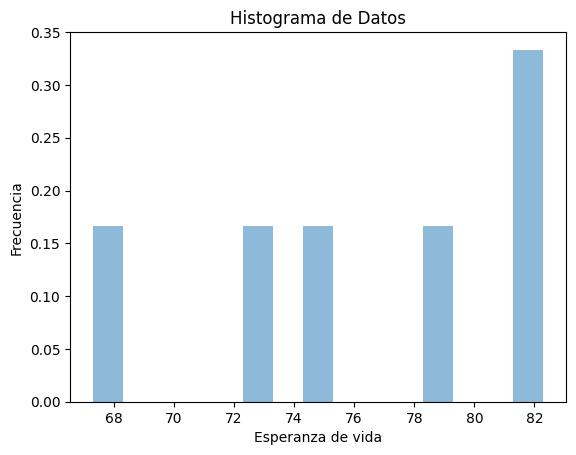

In [23]:
# Crear un histograma para visualizar la distribución
plt.hist(df_clean['life_expectancy'], 
         bins=15, 
         density=True, 
         alpha=0.5)

# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Esperanza de vida')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia');

- Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.

Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

- Intervalo de Confianza para el PIB

Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [ ]:

#intervalo_confianza(df_clean, "gdp", 0.90)

KeyError: ('continent', 'gdp')

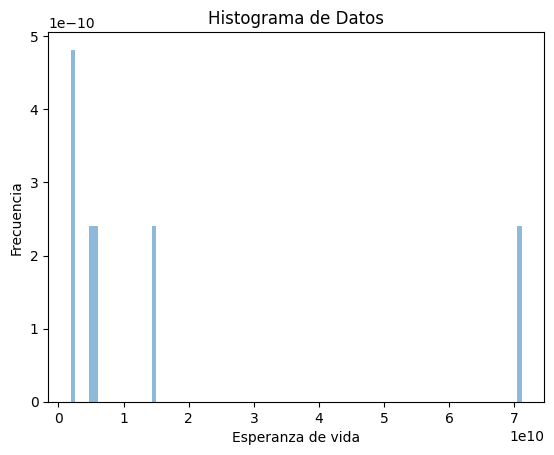

In [26]:
# Crear un histograma para visualizar la distribución
plt.hist(df_clean['gdp'], 
         bins=100, 
         density=True, 
         alpha=0.5)

# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Esperanza de vida')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia');

**Bonus**
- Intervalo de Confianza para la Tasa de Natalidad

Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.

- Intervalo de Confianza para la Tasa de Desempleo

Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

- Intervalo de Confianza para la Tasa de Impuestos

Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.